In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('model_data.csv')
print(df.shape)

(42000, 785)


In [4]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data collection

In [5]:
data=np.array(df.values)
print(type(data))

<class 'numpy.ndarray'>


In [6]:
data.shape

(42000, 785)

In [7]:
# Pixels
X=data[:,1:]
Y=data[:,0]
print(X.shape,Y.shape)

(42000, 784) (42000,)


In [10]:
split=int(0.8*X.shape[0])
X_train=X[:split,:]
Y_train=Y[:split]

X_test=X[split:,:]
Y_test=Y[split:]
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


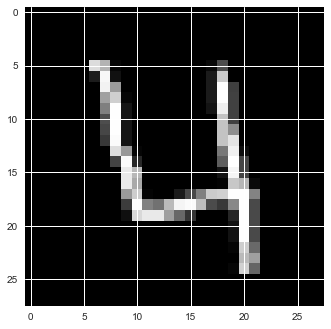

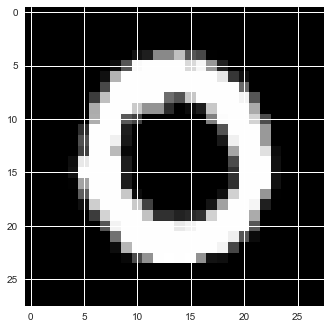

In [17]:
#Visualising data
def drwImg(sam):
    img=sam.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

drwImg(X_train[3])
drwImg(X_train[1])

In [31]:
def dist(x1,x2):
    return (np.sqrt(sum((x1-x2)**2)))
def knn(X,Y,qpt,k=5):
    vals=[]
    m=X.shape[0]
    for i in range(m):
        d=dist(qpt,X[i])
        vals.append((d,Y[i]))
    
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    newVal=np.unique(vals[:,1],return_counts=True)
    idx=newVal[1].argmax()
    pred=newVal[0][idx]
    return pred
    

In [34]:
pred=knn(X_train,Y_train,X_test[100])
print(int(pred))

5


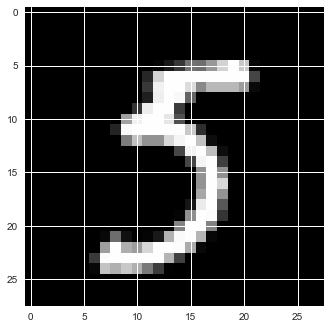

5


In [33]:
drwImg(X_test[100])
print(Y_test[100])

In [ ]:
n=X_test.shape[0]
cnt=0
for i in range(n):
    pred=knn(X_train,Y_train,X_test[i])
    if(pred==Y_test[i]) :
        cnt+=1

print(cnt*100/n)